<a href="https://colab.research.google.com/github/j-w-dell/clustering/blob/main/particle_in_a_box_model_fitting_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from Professor Robustelli's quantum chemistry class (CHEM 76 Spring 2021)

In [ ]:
# matplotlib library for plotting and visualization
import matplotlib as mpl
import matplotlib.pylab as plt

# numpy library for numerical manipulation, especially suited for data arrays
import numpy as np
import warnings
import scipy, scipy.optimize
from mpl_toolkits.mplot3d import Axes3D

# to colormap 3D surfaces from blue to red
from matplotlib import cm

warnings.filterwarnings('ignore')

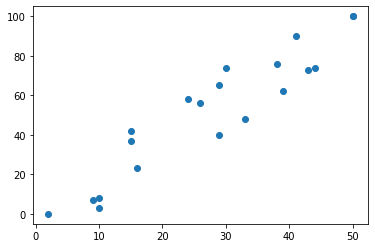

9 7


In [ ]:
# Linear Regression Example: https://data36.com/linear-regression-in-python-numpy-polyfit/
# Here is some data we will use to illustrate how to perfrom a regression:
x_data = np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data = np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])
plt.scatter(x_data,y_data)
plt.show()
print(x_data[1],y_data[1])

In [ ]:
# 'line_fit' takes x- and y-data and the degree of
#  the polynomial you want to fit and stores parameters
# degree 1 = line (a*x+b)
#        2 = quadratic (a*x^2+b*x+c)
#        3 = cubic (a*x^3+b*x^2+c*x+d)
line_fit = np.polyfit(x_data, y_data, 1)

# The function 'polyfit' returns the coefficients
#  for the polynomial you have just fit;
#  these coefficients are stored in an array.
# Here we print out all the items in the array:
print(line_fit)
# This is the equation we have fit
print("y=a*x+b")

# Here we print each coeffiicent one at a time. The a coefficient is stored 
#  in the 0th position in our array of parameters, (line_fit[0])
print("a:", line_fit[0])
# The b coefficient is stored in the 1st position
#  in our array of parameters, (line_fit[1])
print("b:", line_fit[1])


[ 2.01467487 -3.9057602 ]
y=a*x+b
a: 2.0146748714407274
b: -3.9057601953361125


In [ ]:
# We want to plot the line: y = 2.01467487 * x - 3.9057602
# To do this, we need to create an array of x-values
#  that we will feed into our function to generate y-values
# We do this the funciton linspace, which will create an array
#  of 51 values that span from 0 to 50 in an interval of 1:
x = np.linspace(0, 50, 51)

# Let's look at our array. We print its length and values:
print(len(x), x)
# Now let's use the coefficients from our linear fit
#  to map the array of x-values onto our line
y = line_fit[0]*x + line_fit[1]
print(y)

51 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[-3.9057602  -1.89108532  0.12358955  2.13826442  4.15293929  6.16761416
  8.18228903 10.1969639  12.21163878 14.22631365 16.24098852 18.25566339
 20.27033826 22.28501313 24.299688   26.31436288 28.32903775 30.34371262
 32.35838749 34.37306236 36.38773723 38.4024121  40.41708698 42.43176185
 44.44643672 46.46111159 48.47578646 50.49046133 52.50513621 54.51981108
 56.53448595 58.54916082 60.56383569 62.57851056 64.59318543 66.60786031
 68.62253518 70.63721005 72.65188492 74.66655979 76.68123466 78.69590953
 80.71058441 82.72525928 84.73993415 86.75460902 88.76928389 90.78395876
 92.79863363 94.81330851 96.82798338]


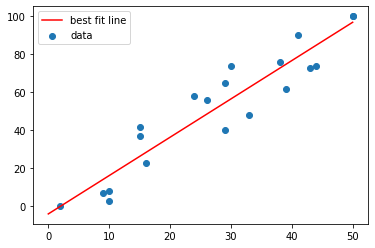

In [ ]:
# Now we plot our data and our linear fit
plt.scatter(x_data, y_data, label='data')
plt.plot(x, y, c='r', label='best fit line')
plt.legend()
plt.show()

Now, let's calculate the [correlation coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination) R<sup>2</sup>.

We will first calculate the deviation of each data point from the average y-value.

We will then square that deviation and take the sum of all of the squared deviations.

In [ ]:
# Calculate the mean
y_mean = np.mean(y_data)
print("Data Mean:", y_mean)

# Subtract the mean value from every data point in y (array operation)
y_deviation = y_data - y_mean
print(y_deviation)

# We square these deviations:
y_deviation_squared = y_deviation**2
# (x**0.5 is taking the square root of x)
print(y_deviation_squared)

# Now, we take the sum of the deviations squared 
#  "Total Sum of Squares":
#  SStot = Summation((y_i - y_ave)^2) for each element i in our dataset
SStot = np.sum(y_deviation_squared)
print("Sum of Squares of y-data:", SStot)

# We generate the y_values predicted by our model:
y_predict = line_fit[0]*x_data + line_fit[1]
# Now, we calculate the sum of the squares of the residuals from our linear fit
#  "Residual Sum of Squares":
#  SS_residuals = Summation((y_pred_i - y_i)^2) for each element i in our dataset
SS_residuals = np.sum((y_predict - y_data)**2)
print("Sum of Squares of the Residuals:", SS_residuals)

# R^2 = 1 - SS_residuals/SS_total
R2 = 1 - SS_residuals/SStot
print("Correlation Coefficient:", R2)

Data Mean: 51.8
[ 13.2 -44.8 -43.8  24.2 -28.8   4.2  48.2 -48.8  22.2  -3.8  21.2 -51.8
  10.2 -14.8  22.2 -11.8  38.2  -9.8   6.2  48.2]
[ 174.24 2007.04 1918.44  585.64  829.44   17.64 2323.24 2381.44  492.84
   14.44  449.44 2683.24  104.04  219.04  492.84  139.24 1459.24   96.04
   38.44 2323.24]
Sum of Squares of y-data: 18749.2
Sum of Squares of the Residuals: 2292.126845149277
Correlation Coefficient: 0.8777480188408424


 
2.015 x - 3.906


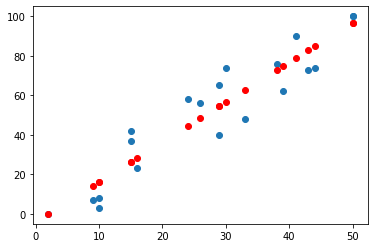

Correlation Coefficient: 0.8777480188408424


In [ ]:
from sklearn.metrics import r2_score
# Let's use a library to calculate the correlation coefficient instead:
#  make a function that is a first order polynomial
#  to predict data based on our linear fit
# line_fit = [a,b]
predict = np.poly1d(line_fit)
# This is our function
print(predict)

# Generate the y-values predicted by our linear fit and plot them
y_predict = predict(x_data)
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_predict, c='r')
plt.show()

# Calculate the Correlation Coefficient with a built-in python function
correlation_coef = r2_score(y_data, predict(x_data))
print("Correlation Coefficient:", correlation_coef)

1st order poloynomial  
2.015 x - 3.906
Correlation Coefficient: 0.8777480188408424

2nd order poloynomial
          2
-0.01059 x + 2.588 x - 9.52
Correlation Coefficient: 0.8817956886030568

10th order poloynomial
            10             9             8            7            6
-9.814e-11 x  + 2.675e-08 x - 3.146e-06 x + 0.000209 x - 0.008633 x
           5         4         3         2
 + 0.2295 x - 3.932 x + 42.21 x - 264.8 x + 838.6 x - 899.5
Correlation Coefficient: 0.9314269716148893

20th order poloynomial
            20             19             18            17
-2.427e-23 x  + 5.422e-21 x  - 3.911e-19 x  + 2.52e-18 x 
              16            15             14             13
 + 7.901e-16 x  - 6.03e-15 x  - 1.868e-12 x  + 3.527e-12 x 
              12             11             10             9
 + 4.592e-09 x  - 7.136e-09 x  - 1.153e-05 x  + 0.0001987 x
            8         7         6         5            4             3
 + 0.02387 x - 1.607 x + 50.07 x - 951.2 x + 1.

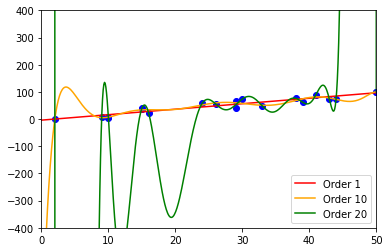

In [ ]:
# Let's fit some really high-order polynomials to our data for fun

line_fit = np.polyfit(x_data, y_data, 1)
line_predict = np.poly1d(line_fit)
print("1st order poloynomial", line_predict)
correlation_coef = r2_score(y_data, line_predict(x_data))
print("Correlation Coefficient:", correlation_coef)

poly_fit2 = np.polyfit(x_data, y_data, 2)
predict2 = np.poly1d(poly_fit2)
print("\n2nd order poloynomial")
print(predict2)
correlation_coef = r2_score(y_data, predict2(x_data))
print("Correlation Coefficient:", correlation_coef)

poly_fit10 = np.polyfit(x_data, y_data, 10)
predict10 = np.poly1d(poly_fit10)
print("\n10th order poloynomial")
print(predict10)
correlation_coef = r2_score(y_data, predict10(x_data))
print("Correlation Coefficient:", correlation_coef)

poly_fit20 = np.polyfit(x_data, y_data, 20)
predict20 = np.poly1d(poly_fit20)
print("\n20th order poloynomial")
print(predict20)
correlation_coef = r2_score(y_data, predict20(x_data))
print("Correlation Coefficient:", correlation_coef, "\n\n")

x = np.linspace(0, 50, 500)
predict_y_1 = line_predict(x)
predict_y_10 = predict10(x)
predict_y_20 = predict20(x)
plt.scatter(x_data, y_data, color='blue')

plt.plot(x,predict_y_1, c='r', label='Order 1')
plt.plot(x,predict_y_10, c='orange', label='Order 10')
plt.plot(x,predict_y_20, c='g', label='Order 20')
plt.ylim(-400, 400)
plt.xlim(0, 50)
plt.legend()
plt.show()

3rd order poloynomial
          3           2
0.000852 x - 0.07988 x + 4.151 x - 17.86
Correlation Coefficient: 0.8867312025237684

4th order poloynomial
           4           3          2
0.0001149 x - 0.01119 x + 0.3284 x - 0.7425 x - 2.976
Correlation Coefficient: 0.9030912305839351

5th order poloynomial
            5            4           3         2
-9.583e-06 x + 0.001381 x - 0.07091 x + 1.524 x - 9.929 x + 13.85
Correlation Coefficient: 0.9127526179002056 




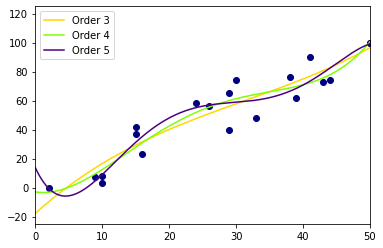

In [ ]:
# Challenge: Can you fit a 3rd, 4th, and 5th order polynomial to our data,
#  calculate the correlation coefficients, and plot the results?
x_data = np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data = np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])

####ADD YOUR CODE HERE######
poly_fit3 = np.polyfit(x_data, y_data, 3)
predict3 = np.poly1d(poly_fit3)
print("3rd order poloynomial")
print(predict3)
correlation_coef = r2_score(y_data, predict3(x_data))
print("Correlation Coefficient:", correlation_coef)

poly_fit4 = np.polyfit(x_data, y_data, 4)
predict4 = np.poly1d(poly_fit4)
print("\n4th order poloynomial")
print(predict4)
correlation_coef = r2_score(y_data, predict4(x_data))
print("Correlation Coefficient:", correlation_coef)

poly_fit5 = np.polyfit(x_data, y_data, 5)
predict5 = np.poly1d(poly_fit5)
print("\n5th order poloynomial")
print(predict5)
correlation_coef = r2_score(y_data, predict5(x_data))
print("Correlation Coefficient:", correlation_coef, "\n\n")

x = np.linspace(0, 50, 500)
predict_y_3 = predict3(x)
predict_y_4 = predict4(x)
predict_y_5 = predict5(x)
plt.scatter(x_data, y_data, color='navy')

plt.plot(x, predict_y_3, c='gold', label='Order 3')
plt.plot(x, predict_y_4, c='chartreuse', label='Order 4')
plt.plot(x, predict_y_5, c='indigo', label='Order 5')
plt.ylim(-25, 125)
plt.xlim(0, 50)
plt.legend()
plt.show()

We're going to introduce a function to calculate the [Root Mean Squared Deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSD) of any given fit to a function to predict some data.

In [ ]:
def calculate_RMSD(y_data, y_predicted):
  y_deviation = y_data - y_predicted
  N = len(y_data)
  y_deviation_squared = y_deviation**2
  return (np.sum(y_deviation_squared)/N)**0.5

In [ ]:
predict_y_1 = line_predict(x_data)
predict_y_3 = predict3(x_data)
predict_y_4 = predict4(x_data)
predict_y_5 = predict5(x_data)
predict_y_10 = predict10(x_data)
predict_y_20 = predict20(x_data)

RMSD_1 = calculate_RMSD(y_data, predict_y_1)
print("RMSD Linear Prediction:", RMSD_1)
RMSD_3 = calculate_RMSD(y_data, predict_y_3)
print("RMSD 3rd order:", RMSD_3)
RMSD_4 = calculate_RMSD(y_data, predict_y_4)
print("RMSD 4th order:", RMSD_4)
RMSD_5 = calculate_RMSD(y_data, predict_y_5)
print("RMSD 5th order:", RMSD_5)
RMSD_10 = calculate_RMSD(y_data, predict_y_10)
print("RMSD 10th order:", RMSD_10)
RMSD_20 = calculate_RMSD(y_data, predict_y_20)
print("RMSD 20th order:", RMSD_20)

RMSD Linear Prediction: 10.705435173661268
RMSD 3rd order: 10.304609011605834
RMSD 4th order: 9.531426702062195
RMSD 5th order: 9.043833856461168
RMSD 10th order: 8.017759736354407
RMSD 20th order: 4.107919206890341


Polynomial Order: 0 RMSD: 30.617968580557395
Polynomial Order: 1 RMSD: 10.705435173661268
Polynomial Order: 2 RMSD: 10.526719040716268
Polynomial Order: 3 RMSD: 10.304609011605834
Polynomial Order: 4 RMSD: 9.531426702062195
Polynomial Order: 5 RMSD: 9.043833856461168
Polynomial Order: 6 RMSD: 8.88324998922205
Polynomial Order: 7 RMSD: 8.639972018250571
Polynomial Order: 8 RMSD: 8.341021188130169
Polynomial Order: 9 RMSD: 8.151099428234197
Polynomial Order: 10 RMSD: 8.017759736354407
Polynomial Order: 11 RMSD: 7.814315334423084
Polynomial Order: 12 RMSD: 7.075713116098078
Polynomial Order: 13 RMSD: 6.922663554747499
Polynomial Order: 14 RMSD: 6.795282730722541
Polynomial Order: 15 RMSD: 4.1080282774310515
Polynomial Order: 16 RMSD: 4.107924616684806
Polynomial Order: 17 RMSD: 4.107919421803455
Polynomial Order: 18 RMSD: 4.107919269746091
Polynomial Order: 19 RMSD: 4.107919314927714
Polynomial Order: 20 RMSD: 4.107919206890341


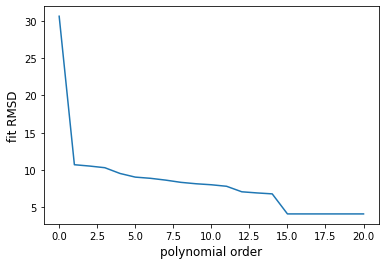

In [ ]:
# Now, let's make a loop to check the fit of a bunch of polynomials
# Make some empty lists in which to store our RMSD values for plotting
polynomial_order = []
polynomial_rmsd = []

# Loop through polynomials of order 0 to 20
#  and create lines of best fit from which
#  to determine RMSD
for i in range(0, 21):
  poly_fit = np.polyfit(x_data, y_data, i)
  predict = np.poly1d(poly_fit)
  y_predict = predict(x_data)
  RMSD = calculate_RMSD(y_data, y_predict)
  polynomial_order.append(i)
  polynomial_rmsd.append(RMSD)
  print("Polynomial Order:", i, "RMSD:", RMSD)

plt.plot(polynomial_order, polynomial_rmsd)
plt.xlabel('polynomial order', size=12)
plt.ylabel('fit RMSD', size=12)
plt.show()

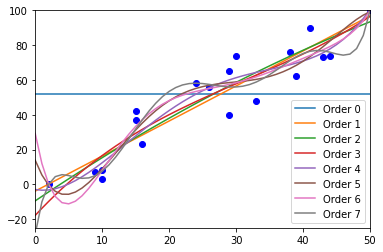

In [ ]:
# We can also use a loop to plot these functions
x = np.linspace(0, 50, 51)
plt.scatter(x_data, y_data, color='blue')

# Loop through polynomials of order 0 to 7
#  and create lines of best fit to plot
for i in range(0, 8):
  poly_fit = np.polyfit(x_data, y_data,i)
  predict = np.poly1d(poly_fit)
  y_predict = predict(x)
  label = 'order %s'%i
  plt.plot(x,y_predict, label='Order %s'%i)

plt.ylim(-25, 100)
plt.xlim(0, 50)    
plt.legend()
plt.show()

Remember the Particle Box? Let's use some of the tools we've developed to determine the Particle in a Box Wavefunction parameters n+L for some data of particle position distributions.

In [ ]:
# Define Psi = ((2/L)^(1/2))*sin(n*pi/L)
# x**0.5 = np.sqrt(x)
def psi(x,n,L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

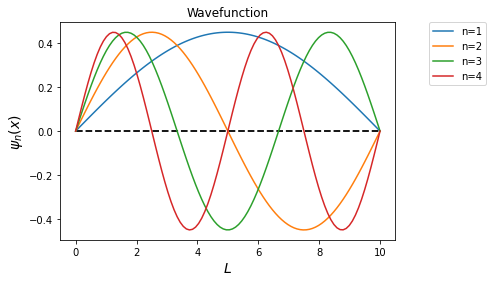

In [ ]:
# Let's plot some wavefunctions with a loop:   
#  n = 1
# Length of box in angstroms
L = 10
x = np.linspace(0,L,100)
# Add a horizontal line at 0
plt.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") 

# Loop through quantum numbers 1 to 4 for n and plot psi
for n in range(1, 5):
  plt.plot(x, psi(x, n, L), label='n=%s'%n)

plt.legend(loc=2);
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$\psi_n(x)$', size=14)
plt.title('Wavefunction')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

A small modification to this loop to plot the probability density:

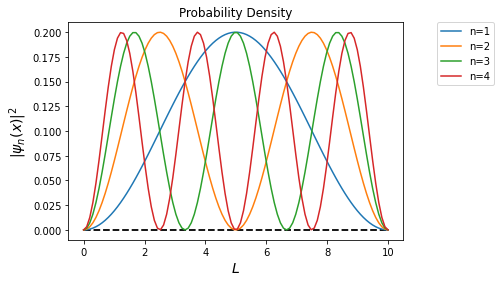

In [ ]:
L = 10
x = np.linspace(0, L, 100)
# Add a horizontal line at 0
plt.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") 

# The same loop, plotting psi squared instead
for n in range(1,5):
  plt.plot(x, psi(x, n, L)**2, label='n=%s'%n)

plt.legend(loc=2);
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$|\psi_n(x)|^2$', size=14)
plt.title('Probability Density')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
# We're going to make a distribution of particle position observations
#  using magic statistics functions to draw random numbers
#  from a defined probability distribution
import scipy.stats as st

def psi(x, n, L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

def exp_measurement_generator(n_exp, L_exp):
  x = np.linspace(0, L, 100)
  class my_pdf(st.rv_continuous):
    def _pdf(self, x):
      # Normalized over its range (in this case, [0,1])
      return psi(x, n_exp, L_exp)**2
  POB_position_generator = my_pdf(a=0, b=L_exp, name='POB_distribution')
  return POB_position_generator

[8.89747121 7.14513902 6.57774815 7.26581812 3.2051871  6.33608439
 8.04215621 6.21992185 8.80716311 3.32938893]


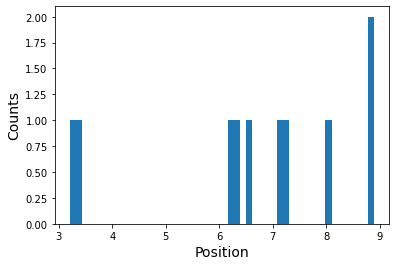

In [ ]:
x = np.linspace(0, L, 100)
n_exp = 2
L_exp = 10
data_generator = exp_measurement_generator(n_exp, L_exp)

# Generate Particle in a Box position measurements
POB_positions = data_generator.rvs(size=10)
# Let's see what positions were generated
print(POB_positions)

# Now, we'll plot a histogram of these positions
hist = plt.hist(POB_positions, bins=50)
plt.xlabel('Position', size=14)
plt.ylabel('Counts', size=14)
plt.show()

Now, we're going to convert the histogram into a normalized probability density.

Instead of counts and bin widths, our x-values are the histogram bin center, and the y-values are the fraction of the counts observed in that bin.


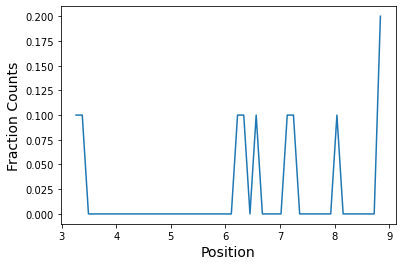

In [ ]:
counts = hist[0]
counts_norm = counts/np.sum(counts)
bin_edges = hist[1]
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centers, counts_norm)
plt.xlabel('Position', size=14)
plt.ylabel('Fraction Counts', size=14)
plt.show()

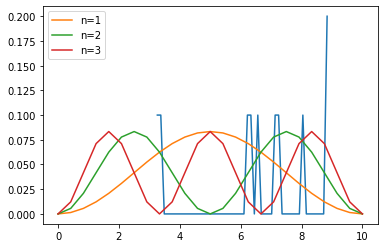

In [ ]:
# Let's check the visual agreement between this data
#  and different POB probability density predictions
#  based on this number of observations

plt.plot(bin_centers, counts_norm)
L = 10
x = np.linspace(0, L, 25)

# Loop through quantum numbers n from 1 to 3
#  and plot probability density
for n in range(1,4):
  psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
  plt.plot(x, psi_prob_norm, label='n=%s'%n)
plt.legend()
plt.show()

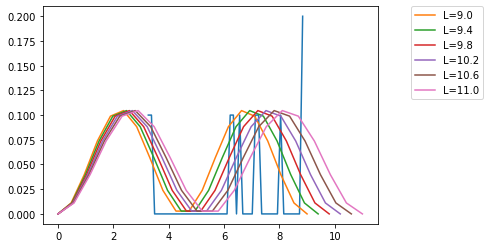

In [ ]:
# Let's see if we can discern L for a given n
x = np.linspace(0, L, 25)
plt.plot(bin_centers, counts_norm)
n = 2
L_values = np.linspace(9, 11, 6)

# Loop through box length L to plot against normalized graph
for L in L_values:
  x = np.linspace(0, L, 20)
  psi_prob_norm = psi(x,n,L)**2/np.sum(psi(x, n, L)**2)
  plt.plot(x,psi_prob_norm, label='L=%s'%L)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

Text(0, 0.5, 'Counts')

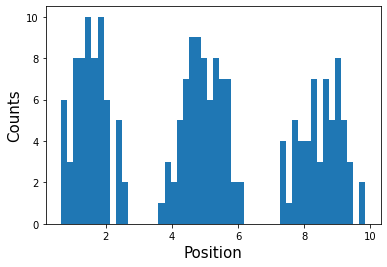

In [ ]:
# Let's try with more observations:
n_exp = 3
L_exp = 10
data_generator = exp_measurement_generator(n_exp, L_exp)

# Generate Particle in a Box position measurements
POB_positions = data_generator.rvs(size=200)

# Now, we'll plot a histogram of these positions
POB_position_hist = plt.hist(POB_positions, bins=50)
plt.xlabel('Position', size=15)
plt.ylabel('Counts', size=15)

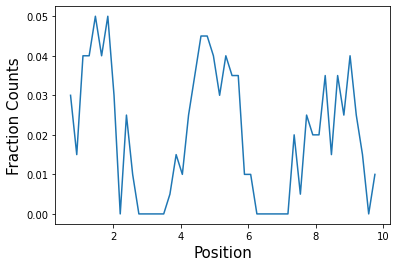

In [ ]:
# Convert new data to normalized format
counts = POB_position_hist[0]
counts_norm = counts/np.sum(counts)
bin_edges = POB_position_hist[1]
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centers, counts_norm)
plt.xlabel('Position', size=15)
plt.ylabel('Fraction Counts', size=15)
plt.show()

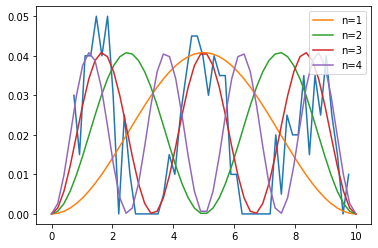

In [ ]:
# Let's try some fits for this data
L = 10
x = np.linspace(0, L, 50)
plt.plot(bin_centers,counts_norm)
for n in range(1, 5):
  psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
  plt.plot(x, psi_prob_norm, label='n=%s'%n)
plt.legend()
plt.show()

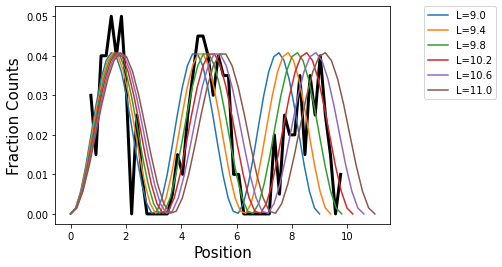

In [ ]:
# Can we determine L now from the data?
plt.plot(bin_centers, counts_norm, c='black', linewidth=3)
L_values = np.linspace(9, 11, 6)
n = 3

# Same loop as before
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
  plt.plot(x, psi_prob_norm, label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position', size=15)
plt.ylabel('Fraction Counts', size=15)
plt.show()

L: 8.0 POB Model RMSD: 0.020866454208656935
L: 8.4 POB Model RMSD: 0.023451479703881187
L: 8.8 POB Model RMSD: 0.02504817764757144
L: 9.2 POB Model RMSD: 0.02552432582071012
L: 9.6 POB Model RMSD: 0.025068625496881977
L: 10.0 POB Model RMSD: 0.024151719193086


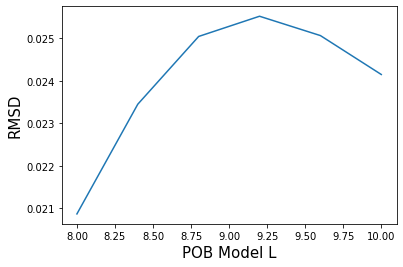

In [ ]:
# Now, let's write a function to determine the agreement
#  for a given POB model with our data
def calculate_RMSD(y_data, y_predicted):
  y_deviation = y_data - y_predicted
  N = len(y_data)
  y_deviation_squared = y_deviation**2
  return (np.sum(y_deviation_squared)/N)**0.5

# Our x-values will be the bin centers and y-values the normalized counts
x_exp = bin_centers
y_exp = counts_norm

L_values = np.linspace(8, 10, 6)
n = 2
Model_L = []
Model_RMSD = []

# Same loop as before but with RMSD/modeling
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp,psi_prob_norm)
  print("L:", L, "POB Model RMSD:", RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L, Model_RMSD)
plt.xlabel('POB Model L', size=15)
plt.ylabel('RMSD', size=15)
plt.show()

L: 10 n: 1 POB Model RMSD: 0.0216492712195763
L: 10 n: 2 POB Model RMSD: 0.024151719193086
L: 10 n: 3 POB Model RMSD: 0.009215059624252458
L: 10 n: 4 POB Model RMSD: 0.020832678967281932
L: 10 n: 5 POB Model RMSD: 0.020770254449079577
L: 10 n: 6 POB Model RMSD: 0.021659434308334162
L: 10 n: 7 POB Model RMSD: 0.022325474138488087


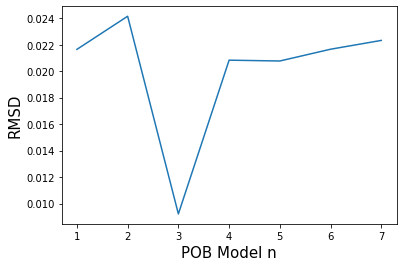

In [ ]:
# Now, let's vary n
L = 10
n = 2
Model_n = []
Model_RMSD = []

# Loop through quantum numbers n from 1 to 7 and plot
#  probability density with RMSD/modeling
for n in range(1, 8):
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "n:", n, "POB Model RMSD:", RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)

plt.plot(Model_n, Model_RMSD)
plt.xlabel('POB Model n', size=15)
plt.ylabel('RMSD', size=15)
plt.show()

Let's say we have a new distribution of POB particle observations in one dimension. Can you determine the most likely values of L and n for these observations?

Can you plot a few of the most plausible wave functions for particle position observations?

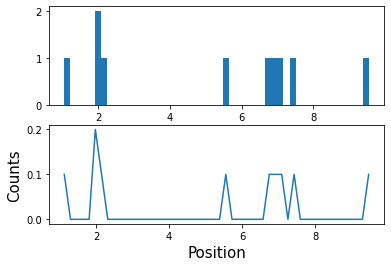

In [ ]:
# Experimental Dataset 1
x = np.linspace(0, L, 100)
n_exp = 8
L_exp = 10
data_generator = exp_measurement_generator(n_exp, L_exp)
# Generate Particle in a Box position measurements
POB_positions_set1 = data_generator.rvs(size=10)

# Plot a histogram of these positions
fig,ax = plt.subplots(2)
position_hist_1 = ax[0].hist(POB_positions_set1, bins=50)
plt.xlabel('Position', size=15)
plt.ylabel('Counts', size=15)

# Plot the normalized version
counts = position_hist_1[0]
counts_norm_1 = counts/np.sum(counts)
bin_edges = position_hist_1[1]
bin_centers_1 = bin_edges[:-1] + np.diff(bin_edges)/2
ax[1].plot(bin_centers_1, counts_norm_1)
plt.show()

L: 10 n: 1 POB Model RMSD: 0.047610457298459315
L: 10 n: 2 POB Model RMSD: 0.04423369809064982
L: 10 n: 3 POB Model RMSD: 0.04723947720375317
L: 10 n: 4 POB Model RMSD: 0.048648246890648575
L: 10 n: 5 POB Model RMSD: 0.046334644753737636
L: 10 n: 6 POB Model RMSD: 0.04667173052165233
L: 10 n: 7 POB Model RMSD: 0.04645510567050221


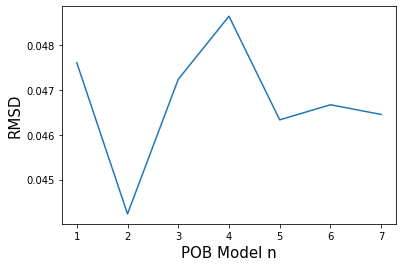

n must be 2

L: 7.0 POB Model RMSD: 0.0469832584852353
L: 7.8 POB Model RMSD: 0.04395557415755827
L: 8.6 POB Model RMSD: 0.042075618268189896
L: 9.4 POB Model RMSD: 0.042994963170947476
L: 10.2 POB Model RMSD: 0.044666922159323184
L: 11.0 POB Model RMSD: 0.046308803739235765


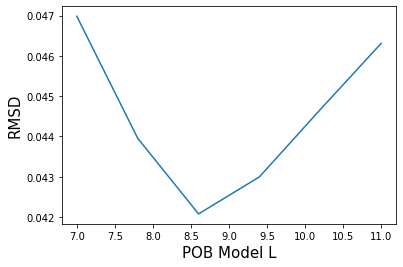

L must be 8.6



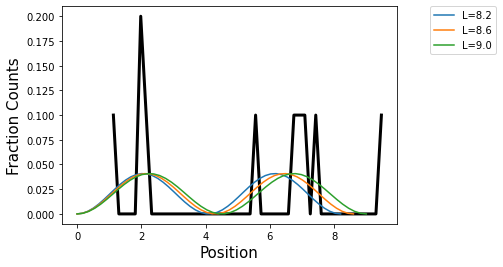

In [ ]:
# ADD CODE TO DETERMINE BEST VALUES OF L AND n
x_exp = bin_centers_1
y_exp = counts_norm_1

# Best n:
L = 10
Model_n = []
Model_RMSD = []

# Loop through quantum numbers n from 1 to 7 and plot
#  probability density with RMSD/modeling
for n in range(1, 8):
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "n:", n, "POB Model RMSD:", RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)

plt.plot(Model_n, Model_RMSD)
plt.xlabel('POB Model n', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("n must be 2\n")


# Best L:
L_values = np.linspace(7, 11, 6)
n = 2
Model_L = []
Model_RMSD = []

# Same loop but with L
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "POB Model RMSD:", RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L, Model_RMSD)
plt.xlabel('POB Model L', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("L must be 8.6\n")


# Plotting some plausible wavefunctions:
plt.plot(bin_centers_1, counts_norm_1, c='black', linewidth=3)

# Cherrypicking close values for L
L = 8.2
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 8.6
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 9.0
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position', size=15)
plt.ylabel('Fraction Counts', size=15)
plt.show()

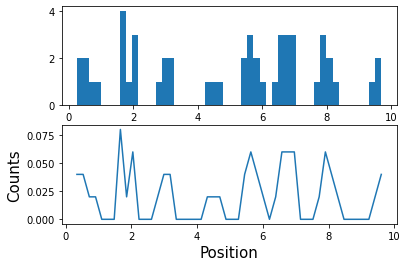

In [ ]:
# Experimental Dataset 2
x = np.linspace(0, L, 100)
n_exp = 8
L_exp = 10
data_generator = exp_measurement_generator(n_exp, L_exp)
# Generate Particle in a Box position measurements
POB_positions_set2 = data_generator.rvs(size=50)

# Plot a histogram of these positions
fig,ax = plt.subplots(2)
position_hist_2 = ax[0].hist(POB_positions_set2, bins=50)
plt.xlabel('Position', size=15)
plt.ylabel('Counts', size=15)

# Plot the normalized version
counts = position_hist_2[0]
counts_norm_2 = counts/np.sum(counts)
bin_edges = position_hist_2[1]
bin_centers_2 = bin_edges[:-1] + np.diff(bin_edges)/2
ax[1].plot(bin_centers_2, counts_norm_2)
plt.show()

L: 10 n: 1 POB Model RMSD: 0.02617051974834056
L: 10 n: 2 POB Model RMSD: 0.025208344481223416
L: 10 n: 3 POB Model RMSD: 0.027388813827621927
L: 10 n: 4 POB Model RMSD: 0.027291742507242107
L: 10 n: 5 POB Model RMSD: 0.028270402045517125
L: 10 n: 6 POB Model RMSD: 0.028914854920508694
L: 10 n: 7 POB Model RMSD: 0.026608934100510125


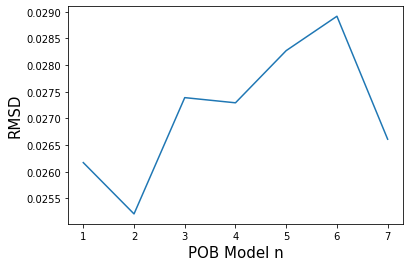

n must be 2

L: 7.0 POB Model RMSD: 0.02693305811983046
L: 7.8 POB Model RMSD: 0.02466073349058087
L: 8.6 POB Model RMSD: 0.02313770316771034
L: 9.4 POB Model RMSD: 0.024122307561661366
L: 10.2 POB Model RMSD: 0.025607949284511558
L: 11.0 POB Model RMSD: 0.027266583280918043


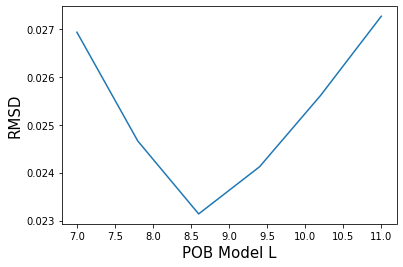

L must be 8.6



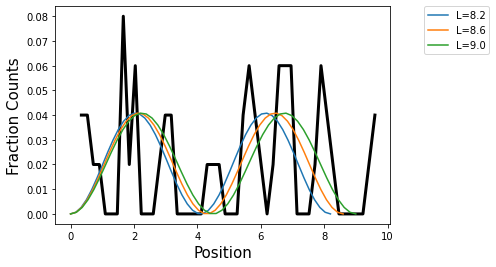

In [ ]:
#ADD CODE TO DETERMINE BEST VALUES OF L AND n
x_exp = bin_centers_2
y_exp = counts_norm_2

# Best n:
L = 10
Model_n = []
Model_RMSD = []

# Loop through quantum numbers n from 1 to 7 and plot
#  probability density with RMSD/modeling
for n in range(1, 8):
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "n:", n, "POB Model RMSD:", RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)

plt.plot(Model_n, Model_RMSD)
plt.xlabel('POB Model n', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("n must be 2\n")


# Best L:
L_values = np.linspace(7, 11, 6)
n = 2
Model_L = []
Model_RMSD = []

# Same loop but with L
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "POB Model RMSD:", RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L, Model_RMSD)
plt.xlabel('POB Model L', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("L must be 8.6\n")


# Plotting some plausible wavefunctions:
plt.plot(bin_centers_2, counts_norm_2, c='black', linewidth=3)

# Cherrypicking close values for L
L = 8.2
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 8.6
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 9.0
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position', size=15)
plt.ylabel('Fraction Counts', size=15)
plt.show()

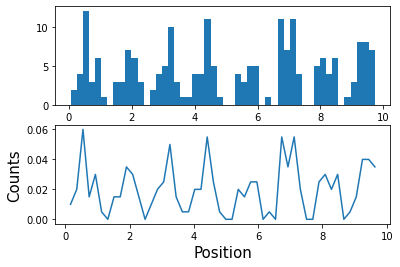

In [ ]:
# Experimental Dataset 3
x = np.linspace(0, L, 100)
n_exp = 8
L_exp = 10
data_generator = exp_measurement_generator(n_exp, L_exp)
# Generate Particle in a Box position measurements
POB_positions_set3 = data_generator.rvs(size=200)

# Plot a histogram of these positions
fig,ax = plt.subplots(2)
position_hist_3 = ax[0].hist(POB_positions_set3, bins=50)
plt.xlabel('Position', size=15)
plt.ylabel('Counts', size=15)

# Plot the normalized version
counts = position_hist_3[0]
counts_norm_3 = counts/np.sum(counts)
bin_edges = position_hist_3[1]
bin_centers_3 = bin_edges[:-1] + np.diff(bin_edges)/2
ax[1].plot(bin_centers_3, counts_norm_3)
plt.show()

L: 10 n: 1 POB Model RMSD: 0.022418833800303056
L: 10 n: 2 POB Model RMSD: 0.021325766167515973
L: 10 n: 3 POB Model RMSD: 0.023453125806346342
L: 10 n: 4 POB Model RMSD: 0.02195845751073792
L: 10 n: 5 POB Model RMSD: 0.02074745973350434
L: 10 n: 6 POB Model RMSD: 0.021326395741010955
L: 10 n: 7 POB Model RMSD: 0.02218621597312762


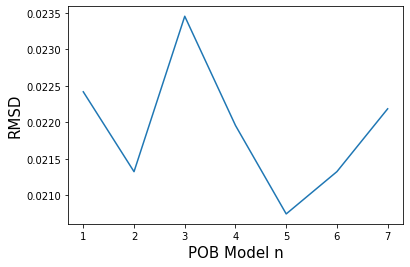

n must be 5

best options for L:
L: 5.368421052631579 POB Model RMSD: 0.020833881056632114
L: 6.105263157894736 POB Model RMSD: 0.01571917624534746
L: 6.473684210526316 POB Model RMSD: 0.013840913042673864
L: 7.578947368421053 POB Model RMSD: 0.020477290088847636
L: 10.157894736842106 POB Model RMSD: 0.020540210097657167
L: 10.526315789473685 POB Model RMSD: 0.020889566739331962


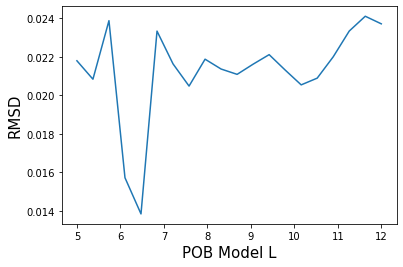

L is ideally 6.3, but 10.2 is more in line with the experiment



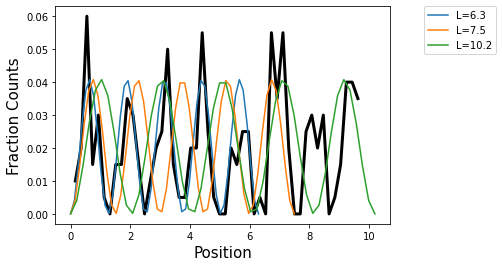

In [ ]:
#ADD CODE TO DETERMINE BEST VALUES OF L AND n
x_exp = bin_centers_3
y_exp = counts_norm_3

# Best n:
L = 10
Model_n = []
Model_RMSD = []

# Loop through quantum numbers n from 1 to 7 and plot
#  probability density with RMSD/modeling
for n in range(1, 8):
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  print("L:", L, "n:", n, "POB Model RMSD:", RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)

plt.plot(Model_n, Model_RMSD)
plt.xlabel('POB Model n', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("n must be 5\n")


# Best L:
L_values = np.linspace(5, 12, 20)
n = 5
Model_L = []
Model_RMSD = []

# Same loop but with L
print("best options for L:")
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm = psi(x_exp, n, L)**2/np.sum(psi(x_exp, n, L)**2)
  RMSD = calculate_RMSD(y_exp, psi_prob_norm)
  if RMSD < 0.021:
    print("L:", L, "POB Model RMSD:", RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L, Model_RMSD)
plt.xlabel('POB Model L', size=15)
plt.ylabel('RMSD', size=15)
plt.show()
print("L is ideally 6.3, but 10.2 is more in line with the experiment\n")


# Plotting some plausible wavefunctions:
plt.plot(bin_centers_3, counts_norm_3, c='black', linewidth=3)

# Cherrypicking close values for L
L = 6.3
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 7.5
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)
L = 10.2
x = np.linspace(0, L, 50)
psi_prob_norm = psi(x, n, L)**2/np.sum(psi(x, n, L)**2)
plt.plot(x, psi_prob_norm, label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position', size=15)
plt.ylabel('Fraction Counts', size=15)
plt.show()